# Feature Engineering

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics, preprocessing, pipeline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Import Dataframe

In [2]:
df = pd.read_csv('csv_files/12_12_DF_log_state_FINAL.csv')

### Initial look at dataframe

In [3]:
df.tail()

,Life Expectancy,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.102956,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,2.342667,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.084430,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,0.477728,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.419728,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Test, Train, Split

In [4]:
# the target is panda series of the dependent variable
target = df['Life Expectancy'] 

# make dataframe of just feature, or independent variables
features = df.drop(columns=['Life Expectancy']) # taking target out of dataframe

# look at features dataframe
features.tail()

,Percent Smokers,Percent Obese,Unemployment_rate_2010,log_food_stamps,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
2978,0.306336,-0.751646,-0.877782,-0.773864,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2979,-2.827030,-4.134520,-0.530616,-0.509604,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2980,-0.398064,-0.183891,-0.751540,-5.517516,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2981,-0.422354,-1.532309,-1.098706,1.532639,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2982,0.063440,0.170956,-1.445873,-0.972225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# split the data to train and test our model
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0,test_size=0.2)


In [7]:
# check the length of our train and test dataframes

print(' Length of ',
    '\n Feautures Training Data:',len(X_train),
    '\n Features Test Data:', len(X_test), 
    '\n Target Training Data:', len(y_train),
    '\n Target Test Data:', len(y_test))

 Length of  
 Feautures Training Data: 2386 
 Features Test Data: 597 
 Target Training Data: 2386 
 Target Test Data: 597


## Ordinary Least Squares

Using the sum of the squared differences between our features (the observed dependent features), such as percent of the population that are smokers per county and percent of that population that is obese, we calculated the error.

In [10]:
# set the X_train dataframe to a variable to build a linear regression model with
predictors = X_train #features

# add constant term to predictors
predictors_int = sm.add_constant(predictors)

# make a baseline OLS model fit to our training data
model = sm.OLS(y_train,predictors_int).fit()
#sm.OLS(df['Life Expectancy'],predictors_int).fit()

# print out a summary of the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life Expectancy   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     174.6
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:44:16   Log-Likelihood:                -1472.2
No. Observations:                2386   AIC:                             3052.
Df Residuals:                    2332   BIC:                             3364.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.6100      0.065     -9.325      0.000      -0.738      -0.482
Percent Smokers           -0.5154      0.015    -33.921      0.000      -0.545      -0.486
Percent Obese             -0.2725      0.015    -17.690      0.000      -0.303      -0.242
Unemployment_rate_2010    -0.1011      0.016     -6.360      0.000      -0.132      -0.070
log_food_stamps            0.0026      0.010      0.264      0.792      -0.017       0.022
Alaska                     0.4988      0.148      3.372      0.001       0.209       0.789
Arizona                   -0.0099      0.114     -0.087      0.931      -0.233       0.213
Arkansas                   0.2905      0.088      3.286      0.001       0.117       0.464
California                -0.2731      0.075     -3.644      0.000      -0.420      -0.126
Colorado                  -0.0981      0.075     -1.313      0.189      -0.245       0.048
Connecticut                0.0469      0.153      0.307      0.759      -0.252       0.346
Delaware                   0.9728      0.459      2.121      0.034       0.074       1.872
Florida                   -0.0355      0.071     -0.499      0.618      -0.175       0.104
Georgia                    0.0141      0.076      0.186      0.852      -0.135       0.163
Hawaii                     0.9519      0.329      2.892      0.004       0.307       1.597
Idaho                      0.6843      0.103      6.630      0.000       0.482       0.887
Illinois                   0.8155      0.085      9.593      0.000       0.649       0.982
Indiana                    1.0221      0.086     11.886      0.000       0.853       1.191
Iowa                       1.1693      0.086     13.558      0.000       1.000       1.338
Kansas                     0.8408      0.087      9.704      0.000       0.671       1.011
Kentucky                   0.6287      0.081      7.721      0.000       0.469       0.788
Louisiana                  0.1977      0.098      2.009      0.045       0.005       0.391
Maine                      0.1659      0.122      1.364      0.173      -0.073       0.404
Maryland                   0.4301      0.132      3.266      0.001       0.172       0.688
Massachusetts              0.0532      0.131      0.405      0.686      -0.205       0.311
Michigan                   1.2921      0.084     15.344      0.000       1.127       1.457
Minnesota                  1.3857      0.089     15.551      0.000       1.211       1.560
Mississippi               -0.1528      0.086     -1.787      0.074      -0.321       0.015
Missouri                   0.9389      0.081     11.523      0.000       0.779       1.099
Montana                    0.4347      0.100      4.345      0.000       0.238       0.631
Nebraska                   1.0502      0.090     11.675      0.000       0.874  

# r-sq is 0.799, which is very good! 

r-sq = "translates in the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, that which the model and predictors fail to grasp."

adj. r-sq is 0.794, which is also great.

From our initial model readout above, it looks like log_food_stamps, AZ, CO, CT, FL, GA, ME, MA, MS, RI, TX, UT all have p-values > 0.05, meaning that there is no statistically significant relationship between these variables and Life Expectancy. 

**later we might want to take out the above ^ features and see if we can get our p-value higher**

We have slight negative skew at -0.285 and we are leptokurtic at 5.619, the latter meaning that we have some outlier data points, or occasional values exceeding (in terms of standard deviations from the mean) what is predicted by the normal distribution.

In [13]:
# predict new y values
y_ols_pred = model.predict(sm.add_constant(X_test))


Text(0,0.5,'Predicted Y-Values from Baseline Model')

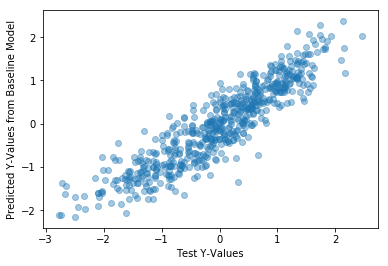

In [30]:
# plot the y-values our model (based on the training data) predicted vs the y-values from our test data to evaluate our model's performance
plt.scatter(y_test, y_ols_pred, alpha=0.4)
plt.xlabel('Test Y-Values')
plt.ylabel('Predicted Y-Values from Baseline Model')

^ why are we doing this above and why are we doing regression with scikit learn and statsmodel? Let's just use 1. I vote for scikit learn. - AL


## Scikit-learn regression

In [31]:
# set the y variable to Life Expectancy
y = df['Life Expectancy']

# set the linear regression method to a variable
linreg = LinearRegression()

# fit a linear regression to the predictors (features) and life expectancy
linreg.fit(predictors, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# get coefficients of the linear regression
print(linreg.coef_ ,  '\n There are',len(linreg.coef_),'coefficients for the linear regression','\n the y-intercept is ', linreg.intercept_)
print('The model is a ', type(linreg))
print('The R-squared value is ', linreg.score(X_train, y_train), 'which maps to the OLS R-squared value of .808')

# predict the y value from the linear regression model
y_pred = linreg.predict(X_test)


[-5.15483625e-01 -2.72476557e-01 -1.00999467e-01  2.64948194e-03
 -3.07738194e+11 -3.07738194e+11  2.89980587e-01 -3.07738194e+11
 -3.07738194e+11 -3.07738194e+11  9.73099709e-01 -3.07738194e+11
  1.39579773e-02  9.51542854e-01  6.83807373e-01  8.15466404e-01
  1.02210236e+00  1.16943359e+00  8.40713501e-01  6.28814697e-01
  1.97561264e-01 -3.07738194e+11  4.29801941e-01 -3.07738194e+11
  1.29191589e+00  1.38579559e+00 -1.52954102e-01  9.38903809e-01
  4.34707642e-01  1.05006409e+00  4.92687225e-01  7.33216047e-01
  4.29283142e-01 -3.07738194e+11  8.58169556e-01  4.07073975e-01
  1.16955566e+00 -3.07738194e+11  2.16827393e-01 -3.07738194e+11
  1.00582504e+00 -3.07738194e+11  2.15469360e-01  9.47677612e-01
  2.36877441e-01  1.29302979e-01  4.79278564e-02  5.27126312e-01
  4.52224731e-01 -3.07738194e+11  6.92504883e-01  1.19749451e+00
  3.89614105e-01  3.07738194e+11] 
 There are 54 coefficients for the linear regression 
 the y-intercept is  -0.609953267479369
The model is a  <class 'sk

Text(0,0.5,'Predicted Values')

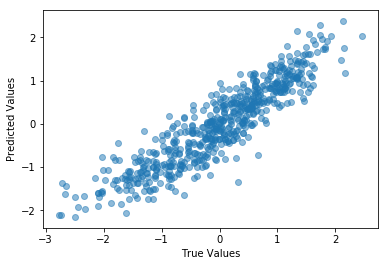

In [34]:
# plot the predicted y-value vs the true-value 
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Feature Selection

### Recursive Feature Elimination 
picks the top *n* features from your model

From [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE): "...the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."

In [201]:
from sklearn.feature_selection import RFE


In [187]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 54)
selector = selector.fit(predictors, y_train)


In [188]:
selector.support_ 


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [189]:
# Fit the linear regression model again using the 5 columns selected

selected_columns = predictors.columns[selector.support_ ]
linreg.fit(predictors[selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
# predict y-hat using new model
yhat = linreg.predict(predictors[selected_columns])


In [191]:
# Comparing metrics w/baseline model

SS_Residual = np.sum((y_train-yhat)**2)
SS_Total = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-predictors[selected_columns].shape[1]-1)

In [192]:
r_squared

0.7987306319927164

In [193]:
adjusted_r_squared

0.7940680211508488

We can see that when we only use the top 5 features for our model our r-squared value significantly decreases from ~ 80% to ~ 60%, meaning that we want to include more features than just the top 5.

After playing around a bit with the *n* value, we found that n = 54 gave us the highest r-squared and adjusted r-squared value (0.7987306319927164 and 0.7940680211508488, respectively). Since we know that our df only has 54 columns, this value doesn't really tell us much about how best features. It's essentially saying that the 54 features we have are the best ones to use (ie our baseline model is best so far).


## Using Filter Methods

## Applying a Wrapper Method to Filtered features

## Creating Interact and Polynomial Terms

In [ ]:
# maybe, depending on how our regression looks

# Final Thoughts